In [1]:
pip install pandas matplotlib seaborn openpyxl numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df1 = pd.read_excel("dados\CVLI_2009-2024.xlsx")
df2 = pd.read_excel("dados\CVLI_2025.xlsx")
df3 = pd.read_excel("dados\DADOS_IBGE.xlsx", header=2)

df = pd.concat([df1, df2], ignore_index=True)
df = df.replace(['Não Informado', 'Não Informada'], np.nan)
df = df[df['Natureza'] == 'HOMICIDIO DOLOSO']
df['Data'] = pd.to_datetime(df['Data'])



print(df.tail())

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:3: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Particular\AppData\Local\Temp\ipykernel_7640\1911961277.py:1: SyntaxWarning: invalid escape sequence '\C'
  df1 = pd.read_excel("Dados\CVLI_2009-2024.xlsx")
C:\Users\Particular\AppData\Local\Temp\ipykernel_7640\1911961277.py:2: SyntaxWarning: invalid escape sequence '\C'
  df2 = pd.read_excel("Dados\CVLI_2025.xlsx")
C:\Users\Particular\AppData\Local\Temp\ipykernel_7640\1911961277.py:3: SyntaxWarning: invalid escape sequence '\D'
  df3 = pd.read_excel("Dados\DADOS_IBGE.xlsx", header=2)


        Município     AIS          Natureza       Data      Hora  \
58553  Maranguape  AIS 24  HOMICIDIO DOLOSO 2025-09-30  11:26:59   
58554   Fortaleza  AIS 03  HOMICIDIO DOLOSO 2025-09-30  13:37:00   
58555      Sobral  AIS 14  HOMICIDIO DOLOSO 2025-09-30  17:00:00   
58556   Fortaleza  AIS 06  HOMICIDIO DOLOSO 2025-09-30  17:14:00   
58557   Maracanaú  AIS 12  HOMICIDIO DOLOSO 2025-09-30  23:21:00   

      Dia da Semana Meio Empregado     Gênero  Idade da Vítima  \
58553         Terça   Arma de fogo  Masculino             38.0   
58554         Terça   Arma de fogo  Masculino             24.0   
58555         Terça   Arma de fogo  Masculino             22.0   
58556         Terça   Outros meios  Masculino             40.0   
58557         Terça   Arma de fogo   Feminino             62.0   

              Escolaridade da Vítima Raça da Vítima  
58553    Ensino Fundamental Completo          Parda  
58554    Ensino Fundamental Completo         Branca  
58555          Ensino Médio Comp

C:\Users\Particular\AppData\Local\Temp\ipykernel_7640\1911961277.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(['Não Informado', 'Não Informada'], np.nan)


In [5]:
crimes_por_municipio = df["Município"].value_counts().reset_index()
crimes_por_municipio.columns = ["Município", "Quantidade"]

crimes_por_municipio.head(10)

,Município,Quantidade
0,Fortaleza,20357
1,Caucaia,3902
2,Maracanaú,2704
3,Juazeiro do Norte,1587
4,Sobral,1284
5,Maranguape,984
6,Aquiraz,930
7,Pacajus,773
8,Horizonte,740
9,Crato,706


In [6]:
print(df.columns)
print(df3.columns)
df_final = crimes_por_municipio.merge(df3, on='Município', how='left')
df_final['taxa_por_100mil'] = (df_final['Quantidade'] / df_final['População estimada - pessoas [2025]']) * 100000
df_final

Index(['Município', 'AIS', 'Natureza', 'Data', 'Hora', 'Dia da Semana',
       'Meio Empregado', 'Gênero', 'Idade da Vítima', 'Escolaridade da Vítima',
       'Raça da Vítima'],
      dtype='object')
Index(['Município', 'Código [-]', 'Gentílico [-]', 'Prefeito [2025]',
       'Área Territorial - km² [2024]',
       'População no último censo - pessoas [2022]',
       'Densidade demográfica - hab/km² [2022]',
       'População estimada - pessoas [2025]',
       'Escolarização <span>6 a 14 anos</span> - % [2022]',
       'IDHM <span>Índice de desenvolvimento humano municipal</span> [2010]',
       'Mortalidade infantil - óbitos por mil nascidos vivos [2023]',
       'Total de receitas brutas realizadas - R$ [2024]',
       'Total de despesas brutas empenhadas - R$ [2024]',
       'PIB per capita - R$ [2021]'],
      dtype='object')


,Município,Quantidade,Código [-],Gentílico [-],Prefeito [2025],Área Territorial - km² [2024],População no último censo - pessoas [2022],Densidade demográfica - hab/km² [2022],População estimada - pessoas [2025],Escolarização <span>6 a 14 anos</span> - % [2022],IDHM <span>Índice de desenvolvimento humano municipal</span> [2010],Mortalidade infantil - óbitos por mil nascidos vivos [2023],Total de receitas brutas realizadas - R$ [2024],Total de despesas brutas empenhadas - R$ [2024],PIB per capita - R$ [2021],taxa_por_100mil
0,Fortaleza,20357,2304400.0,fortalezense,EVANDRO SA BARRETO LEITAO,312.353,2428708.0,7775.52,2578483.0,97.98,0.754,11.78,1.326741e+10,1.426542e+10,27164.45,789.495219
1,Caucaia,3902,2303709.0,caucaiense,NAUMI GOMES DE AMORIM,1223.200,355679.0,290.77,378406.0,98.32,0.682,14.4,1.582737e+09,1.629480e+09,28229.51,1031.167582
2,Maracanaú,2704,2307650.0,maracanauense,ROBERTO SOARES PESSOA,105.084,234509.0,2231.91,251613.0,98.83,0.686,10.76,1.607384e+09,1.543799e+09,53410.24,1074.666253
3,Juazeiro do Norte,1587,2307304.0,juazeirense,GLÊDSON LIMA BEZERRA,258.788,286120.0,1105.62,305531.0,98.84,0.694,12.46,1.123896e+09,1.096930e+09,18381.08,519.423561
4,Sobral,1284,2312908.0,sobralense,OSCAR SPINDOLA RODRIGUES JUNIOR,2068.474,203023.0,98.15,216519.0,98.98,0.714,8.72,1.485740e+09,1.441887e+09,25396.38,593.019550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,Pires Ferreira,9,2310951.0,pires-ferreirense,LIVIA MARIA MESQUITA MORORO MUNIZ MARQUES,244.464,10606.0,43.38,10984.0,99.56,0.591,21.28,7.533982e+07,6.388065e+07,7621.25,81.937363
180,Alcântaras,7,2300507.0,alcantarense,CHARLYNE CUNHA FREIRE,135.760,11369.0,83.74,11795.0,99.20,0.600,7.35,7.230314e+07,6.638882e+07,8289.87,59.347181
181,Granjeiro,5,2304806.0,granjeirense,FRANCISCO CLEMENTINO DE ALMEIDA,111.528,4841.0,43.41,4955.0,99.57,0.585,-,6.159843e+07,5.228745e+07,10730.92,100.908174
182,Pacujá,3,2309904.0,pacujaense,PEDRO ALLAN DE SOUSA LEOPOLDINO,88.355,6175.0,69.89,6348.0,99.34,0.621,-,5.776575e+07,5.468602e+07,9130.30,47.258979


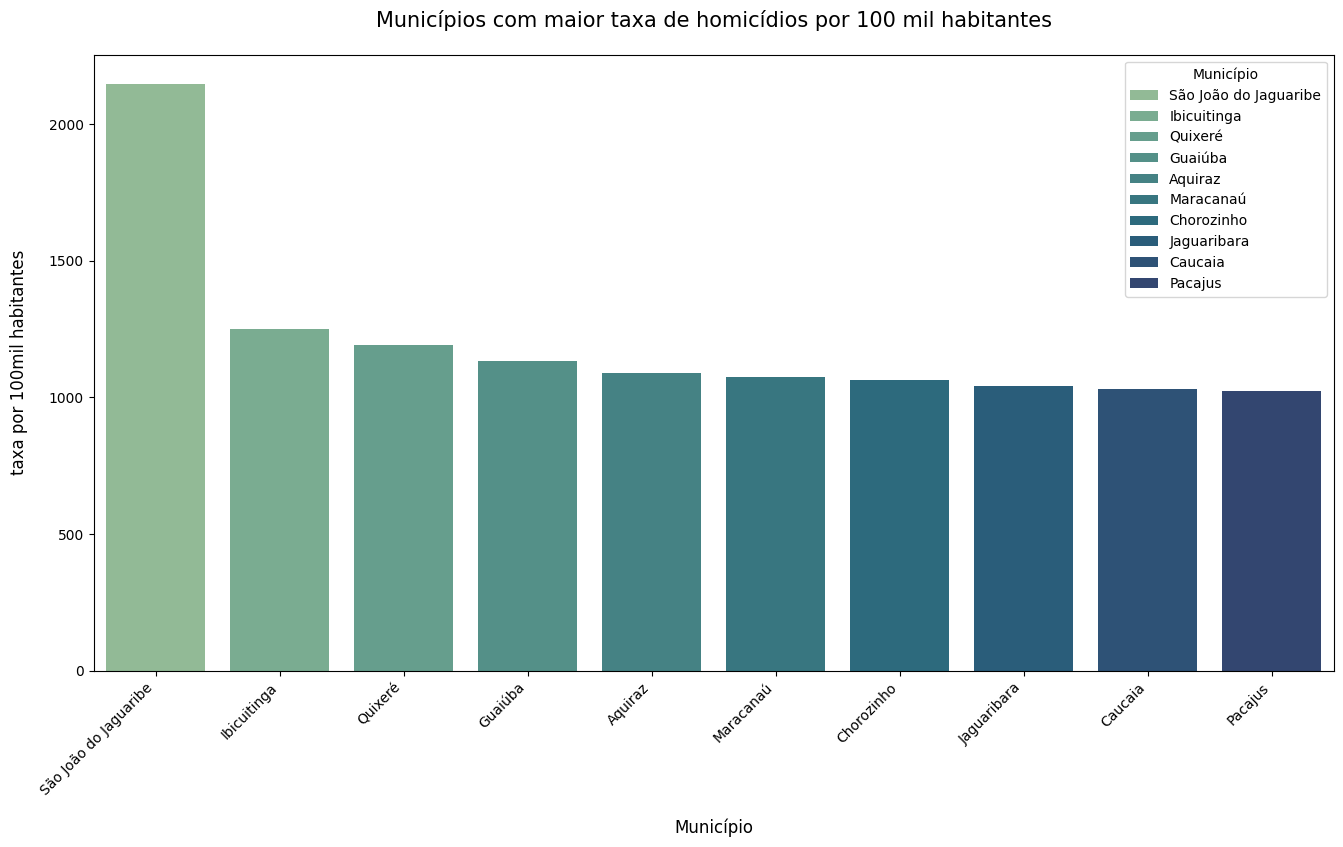

In [7]:
top10 = df_final.sort_values("taxa_por_100mil", ascending=False).head(10)

plt.figure(figsize=(16,8))
sns.barplot(data=top10, x="Município", y="taxa_por_100mil", palette="crest", hue="Município", legend=True)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Município",fontsize=12, labelpad=15)
plt.ylabel("taxa por 100mil habitantes",fontsize=12, labelpad=15)
plt.title("Municípios com maior taxa de homicídios por 100 mil habitantes", fontsize=15, pad=20)
plt.show()

In [8]:
mortes_por_idade = df["Idade da Vítima"].value_counts().reset_index()
mortes_por_idade.columns = ["Idade da Vítima", "Quantidade"]

mortes_por_idade.head(10)

,Idade da Vítima,Quantidade
0,20.0,2451
1,21.0,2423
2,19.0,2368
3,18.0,2360
4,22.0,2358
5,23.0,2241
6,24.0,2191
7,25.0,2093
8,17.0,2069
9,26.0,1901


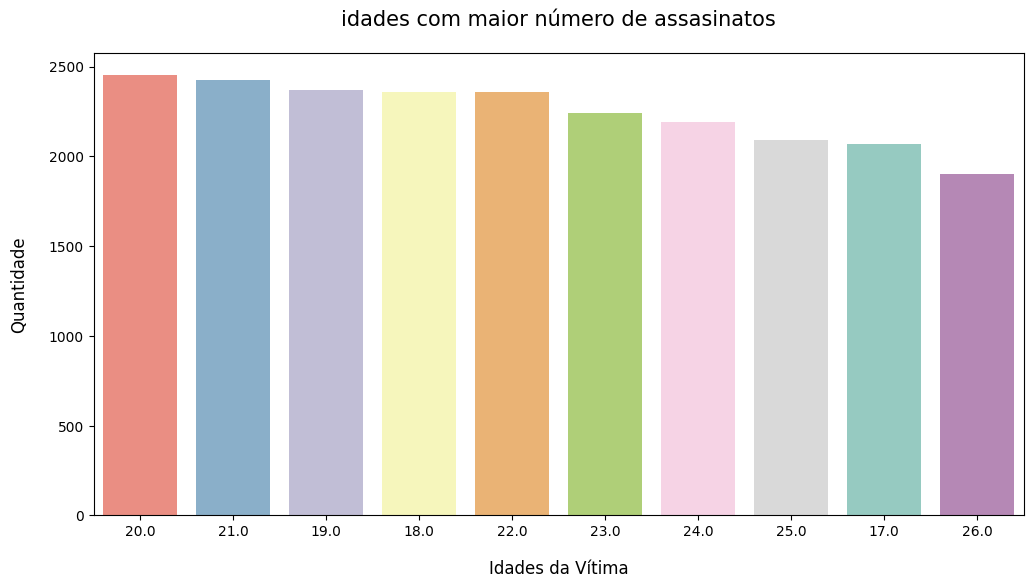

In [ ]:
rank = mortes_por_idade.head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=rank, x="Idade da Vítima", y="Quantidade", palette="Set3", hue="Idade da Vítima", legend=False, order=rank['Idade da Vítima'])
plt.xlabel("Idades da Vítima",fontsize=12, labelpad=15)
plt.ylabel("Quantidade",fontsize=12, labelpad=15)
plt.title( "idades com maior número de assasinatos", fontsize=15, pad=20)
plt.show()

In [ ]:
dia_menos_perigoso = df["Dia da Semana"].value_counts().reset_index()
dia_menos_perigoso.columns = ["Dias da Semana", "Quantidade"]

dia_menos_perigoso.head(7)

,Dias da Semana,Quantidade
0,Domingo,10657
1,Sábado,9730
2,Sexta,7604
3,Segunda,7448
4,Quinta,7256
5,Quarta,6988
6,Terça,6925


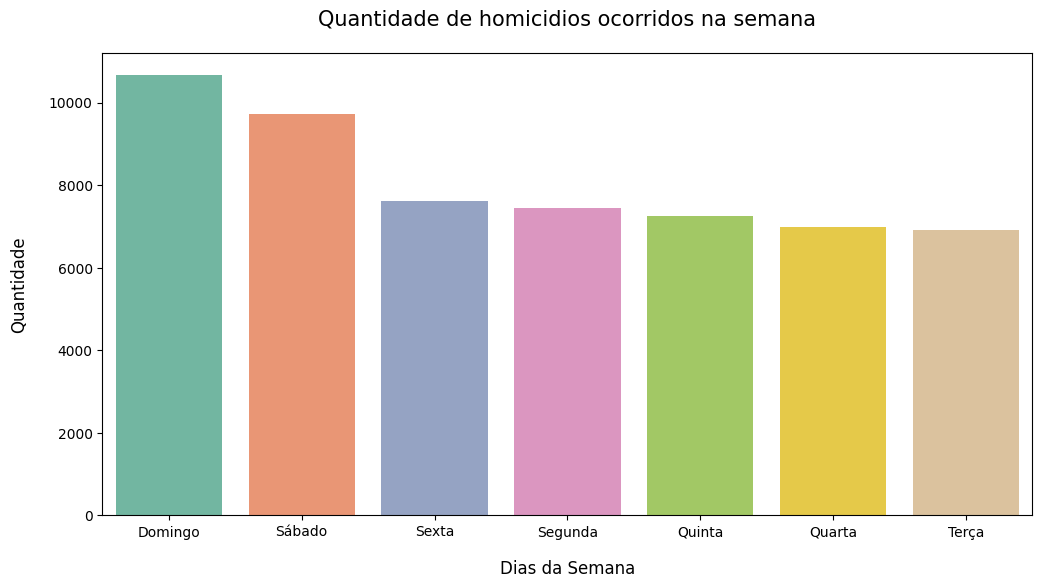

In [ ]:
dia_da_semana = dia_menos_perigoso.head(7)

plt.figure(figsize=(12,6))
sns.barplot(data=dia_da_semana, x="Dias da Semana", y="Quantidade", palette="Set2", hue="Dias da Semana", legend=False)
plt.xlabel("Dias da Semana",fontsize=12, labelpad=15)
plt.ylabel("Quantidade",fontsize=12, labelpad=15)
plt.title("Quantidade de homicidios ocorridos na semana", fontsize=15, pad=20)
plt.show()

In [ ]:
genero_homicidios = df["Gênero"].value_counts().reset_index()
genero_homicidios .columns = ["Gêneros", "Quantidade"]

genero_homicidios.head()

,Gêneros,Quantidade
0,Masculino,52505
1,Feminino,4086


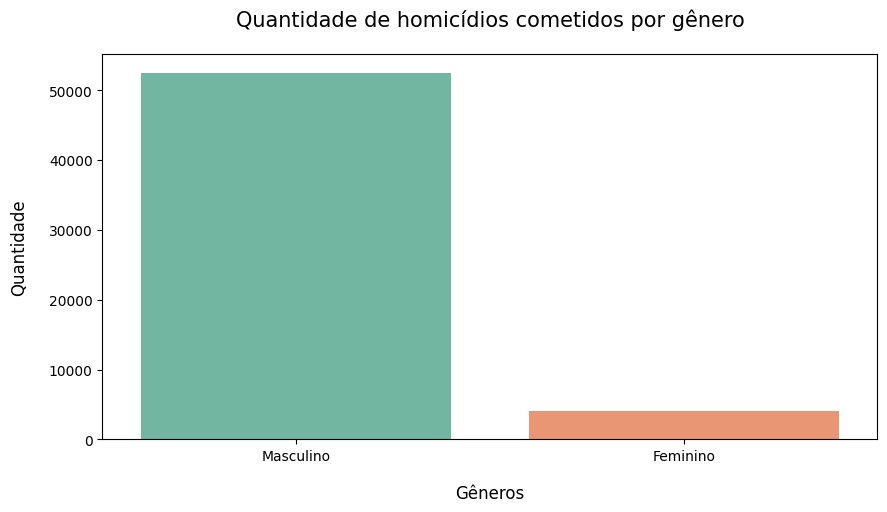

In [ ]:
num_de_crimes= genero_homicidios.head()
plt.figure(figsize=(10,5))
sns.barplot(data=num_de_crimes, x="Gêneros", y="Quantidade", palette="Set2", hue="Gêneros", legend=False)
plt.xlabel("Gêneros",fontsize=12, labelpad=15)
plt.ylabel("Quantidade",fontsize=12, labelpad=15)
plt.title("Quantidade de homicídios cometidos por gênero", fontsize=15, pad=20)
plt.show()

In [ ]:
escolaridade_das_vitimas= df["Escolaridade da Vítima"].value_counts().reset_index()
escolaridade_das_vitimas.columns = ["Escolaridade das Vítimas", "Quantidade"]

escolaridade_das_vitimas.head()

,Escolaridade das Vítimas,Quantidade
0,Alfabetizado,16002
1,Ensino Fundamental Incompleto,8947
2,Ensino Fundamental Completo,6157
3,Ensino Médio Completo,4104
4,Ensino Médio Incompleto,2467


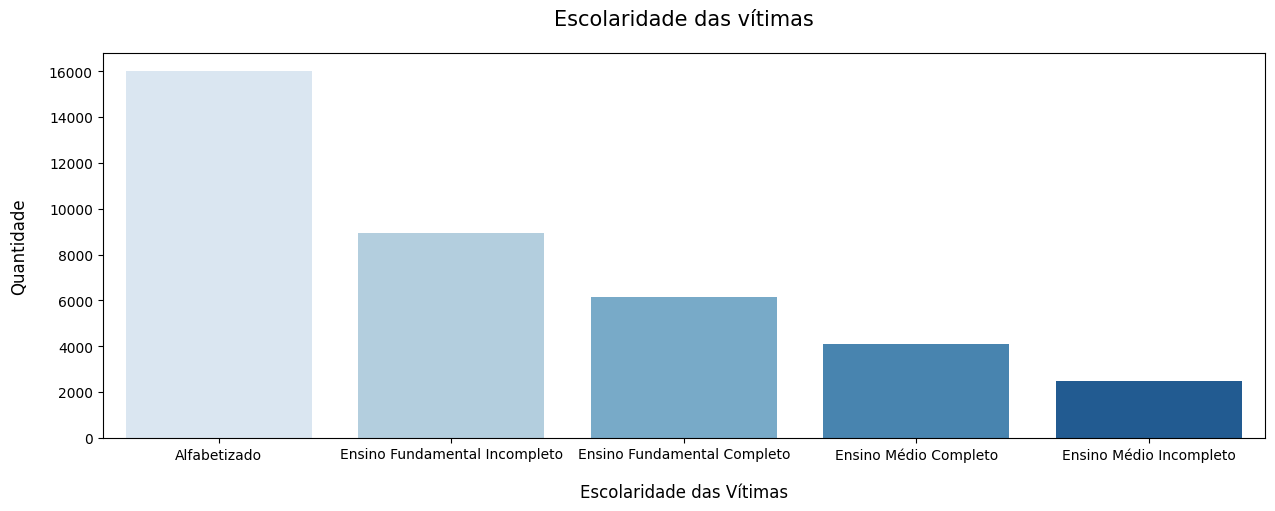

In [ ]:
vitimas= escolaridade_das_vitimas.head()
plt.figure(figsize=(15,5))
sns.barplot(data=vitimas, x="Escolaridade das Vítimas", y="Quantidade", palette="Blues", hue="Escolaridade das Vítimas", legend=False)
plt.xlabel("Escolaridade das Vítimas",fontsize=12, labelpad=15)
plt.ylabel("Quantidade",fontsize=12, labelpad=15)
plt.title("Escolaridade das vítimas", fontsize=15, pad=20)
plt.show()

In [ ]:
df['Hora_str'] = df['Hora'].astype(str)

df_filtrado = df[~df['Hora_str'].str.startswith('00:00:00')].copy()

df_filtrado['Hora_dt'] = pd.to_datetime(df_filtrado['Hora_str'], format='%H:%M:%S.%f', errors='coerce').dt.time

horario_homicidios = (
    df_filtrado['Hora_dt'].astype(str).str[:5]
    .value_counts()
    .reset_index()
)

horario_homicidios.columns = ["Horário do Crime", "Quantidade"]

horario_homicidios = horario_homicidios[horario_homicidios['Horário do Crime'] != 'NaT']

horario_homicidios = horario_homicidios.sort_values("Quantidade", ascending=False)

horario_homicidios.head()

,Horário do Crime,Quantidade
1,19:59,1438
2,19:00,1384
3,22:00,1104
4,20:30,1056
5,21:29,891


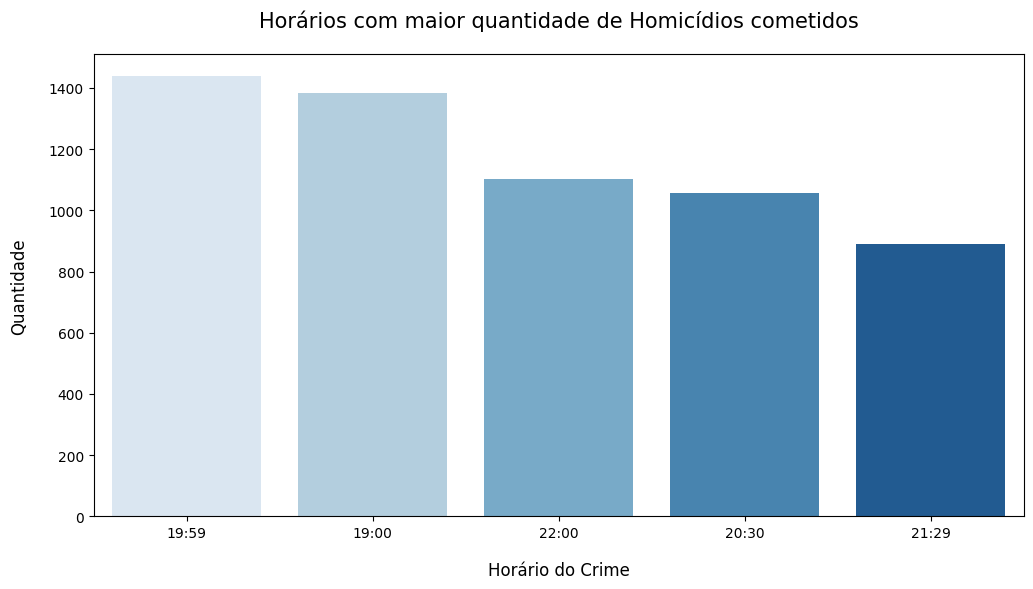

In [ ]:
hora= horario_homicidios.head()

plt.figure(figsize=(12,6))
sns.barplot(data=hora, x="Horário do Crime", y="Quantidade", palette="Blues", hue="Horário do Crime", legend=False)
plt.xlabel("Horário do Crime",fontsize=12, labelpad=15)
plt.ylabel("Quantidade",fontsize=12, labelpad=15)
plt.title("Horários com maior quantidade de Homicídios cometidos", fontsize=15, pad=20)
plt.show()

In [ ]:
df['Data'] = pd.to_datetime(df['Data'], errors='coerce')
df['Ano'] = df['Data'].dt.year
df['Mês'] = df['Data'].dt.month

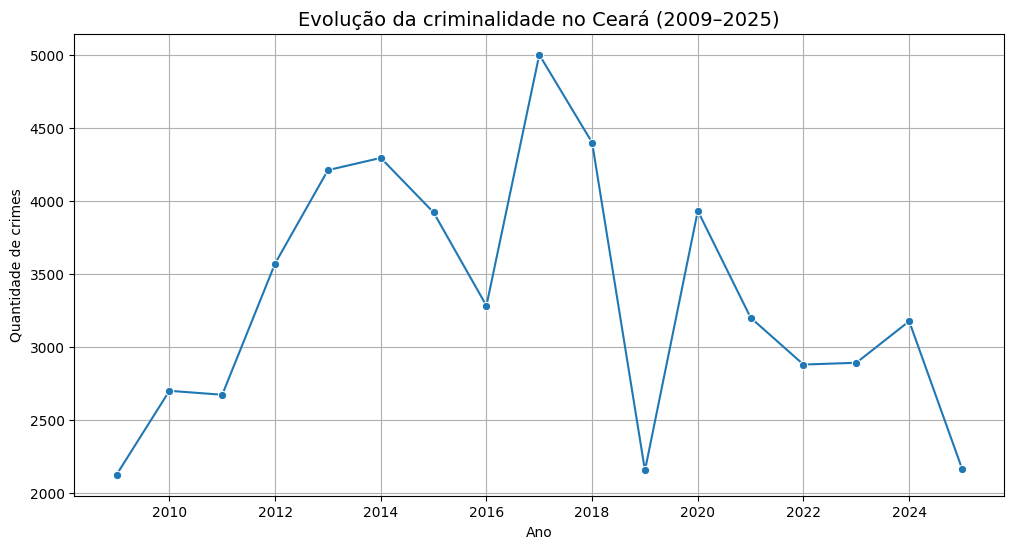

In [ ]:
crimes_por_ano = df.groupby('Ano')['Município'].size().reset_index(name='Quantidade')
crimes_por_ano.columns = ['Ano', 'Quantidade']

plt.figure(figsize=(12,6))
sns.lineplot(data=crimes_por_ano, x="Ano", y="Quantidade", marker="o")
plt.title("Evolução da criminalidade no Ceará (2009–2025)", fontsize=14)
plt.xlabel("Ano")
plt.ylabel("Quantidade de crimes")
plt.grid(True)
plt.show()

In [ ]:
idade_media_por_genero = df.groupby('Gênero')['Idade da Vítima'].mean().reset_index()
idade_media_por_genero = (
    df
    .groupby('Gênero')['Idade da Vítima']
    .mean()
    .round(0)
    .reset_index(name='Idade Média')
)

idade_media_por_genero.columns = ['Gênero', 'Idade Média']
idade_media_por_genero.head()


,Gênero,Idade Média
0,Feminino,30.0
1,Masculino,29.0


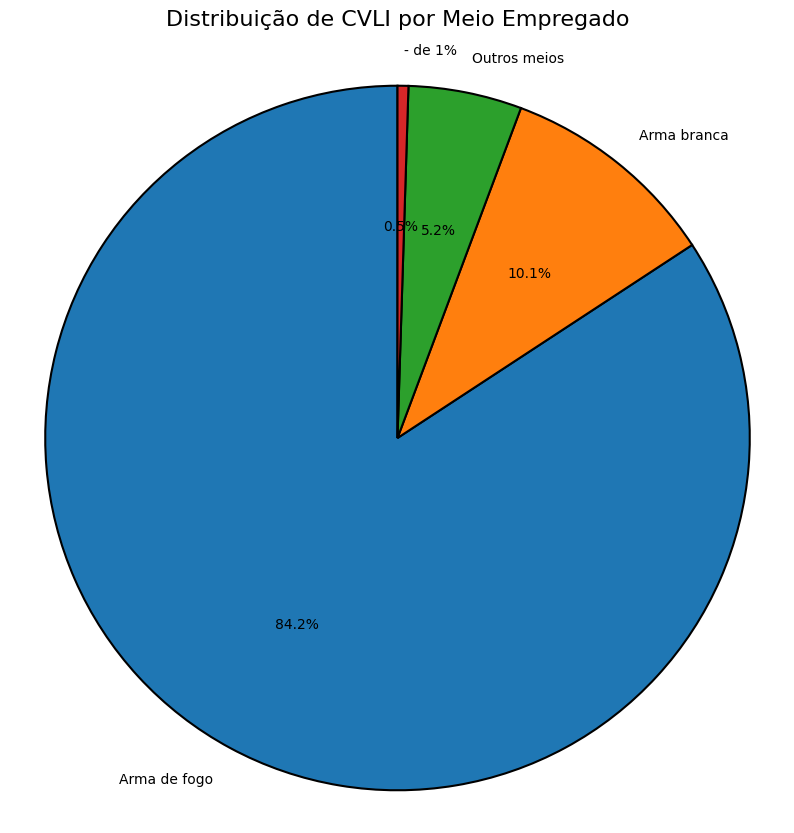

In [ ]:
meio_empregado_counts = df["Meio Empregado"].value_counts(dropna=False)
total_crimes = meio_empregado_counts.sum()
meio_empregado_percent = (meio_empregado_counts / total_crimes) * 100
meios_relevantes = meio_empregado_percent[meio_empregado_percent > 1].sort_values(ascending=False)
outros = meio_empregado_percent[meio_empregado_percent <= 1].sum()
if outros > 0:
    meios_relevantes['- de 1%'    ] = outros
    plt.figure(figsize=(10, 10))
    plt.pie(meios_relevantes,
        labels=meios_relevantes.index,
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})

plt.title('Distribuição de CVLI por Meio Empregado', fontsize=16, pad=20)
plt.axis('equal')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

meio_empregado_counts = df["Meio Empregado"].value_counts(dropna=False)
total_crimes = meio_empregado_counts.sum()
meio_empregado_percent = (meio_empregado_counts / total_crimes) * 100
meios_relevantes_list = meio_empregado_percent[meio_empregado_percent > 1].index.tolist()


df_meios_series = df.groupby(['Ano', 'Mês', 'Meio Empregado']).size().reset_index(name='CVLI_Observado')


df_meios_series_filtrada = df_meios_series[df_meios_series['Meio Empregado'].isin(meios_relevantes_list)].copy()


df_meios_series_filtrada['Mês_Index'] = pd.to_datetime(df_meios_series_filtrada['Ano'].astype(str) + '-' + df_meios_series_filtrada['Mês'].astype(str) + '-01')



previsoes_sarima = {}

for meio in df_meios_series_filtrada['Meio Empregado'].unique():
    print(f"\nTreinando SARIMA para: {meio}")


    serie = df_meios_series_filtrada[df_meios_series_filtrada['Meio Empregado'] == meio]
    serie = serie.sort_values("Mês_Index").set_index('Mês_Index')


    y = serie['CVLI_Observado']


    modelo = SARIMAX(
        y,
        order=(1,1,1),
        seasonal_order=(1,1,1,12),
        enforce_stationarity=False,
        enforce_invertibility=False
    )

    resultado = modelo.fit(disp=False)

    forecast = resultado.get_forecast(steps=60)
    previsoes = forecast.predicted_mean
    previsoes = previsoes.clip(lower=0).round()

    previsoes_sarima[meio] = previsoes
    print(previsoes.head())

for meio, serie_prevista in previsoes_sarima.items():
    print(f"\nPrevisão SARIMA para {meio}:")
    print(serie_prevista)

list_projecao_meios = []
for meio, serie_prevista in previsoes_sarima.items():
    df_temp = serie_prevista.reset_index()
    df_temp.columns = ['Data', 'CVLI_Projetado']
    df_temp['Meio Empregado'] = meio
    df_temp['Ano'] = df_temp['Data'].dt.year
    list_projecao_meios.append(df_temp)

projecao_meios = pd.concat(list_projecao_meios, ignore_index=True)


Treinando SARIMA para: Arma branca


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2025-10-01    17.0
2025-11-01    19.0
2025-12-01    19.0
2026-01-01    16.0
2026-02-01    12.0
Freq: MS, Name: predicted_mean, dtype: float64

Treinando SARIMA para: Arma de fogo


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2025-10-01    251.0
2025-11-01    242.0
2025-12-01    247.0
2026-01-01    257.0
2026-02-01    232.0
Freq: MS, Name: predicted_mean, dtype: float64

Treinando SARIMA para: Outros meios


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2025-10-01    15.0
2025-11-01    13.0
2025-12-01    14.0
2026-01-01    13.0
2026-02-01    13.0
Freq: MS, Name: predicted_mean, dtype: float64

Previsão SARIMA para Arma branca:
2025-10-01    17.0
2025-11-01    19.0
2025-12-01    19.0
2026-01-01    16.0
2026-02-01    12.0
2026-03-01    16.0
2026-04-01    16.0
2026-05-01    15.0
2026-06-01    13.0
2026-07-01    14.0
2026-08-01    15.0
2026-09-01    13.0
2026-10-01    15.0
2026-11-01    18.0
2026-12-01    17.0
2027-01-01    14.0
2027-02-01    11.0
2027-03-01    15.0
2027-04-01    15.0
2027-05-01    14.0
2027-06-01    11.0
2027-07-01    13.0
2027-08-01    13.0
2027-09-01    12.0
2027-10-01    14.0
2027-11-01    17.0
2027-12-01    16.0
2028-01-01    13.0
2028-02-01    10.0
2028-03-01    14.0
2028-04-01    14.0
2028-05-01    12.0
2028-06-01    10.0
2028-07-01    11.0
2028-08-01    12.0
2028-09-01    10.0
2028-10-01    12.0
2028-11-01    15.0
2028-12-01    14.0
2029-01-01    12.0
2029-02-01     8.0
2029-03-01    12.0
2029-04-01    12.0
2029-0

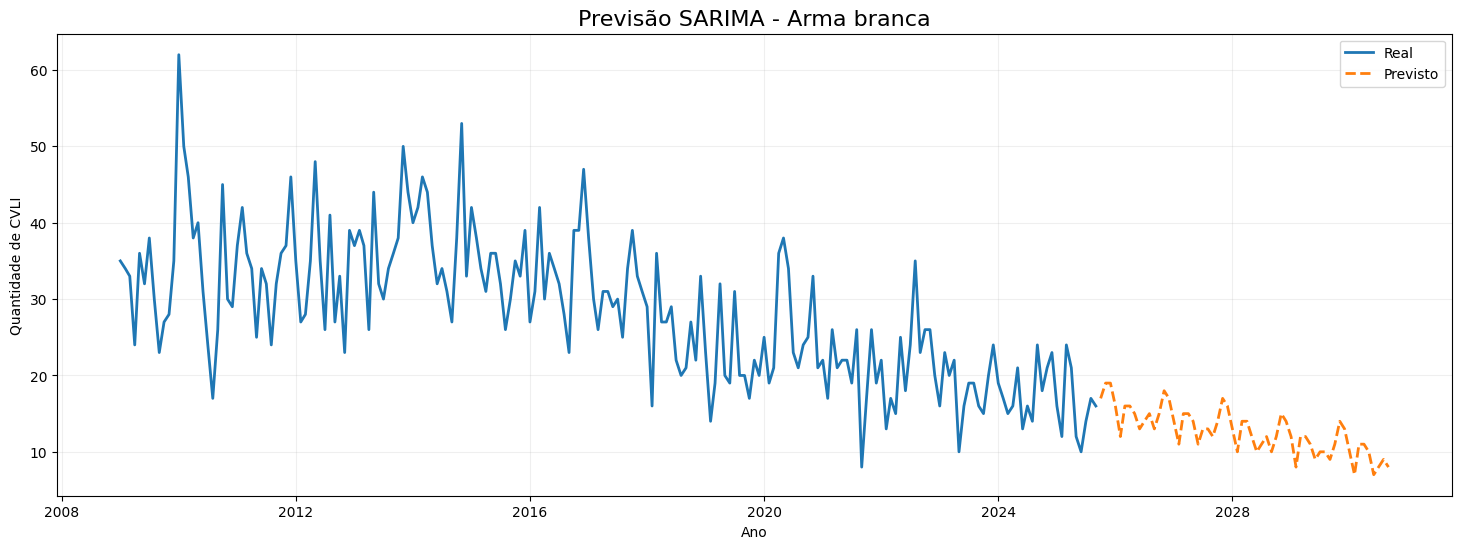

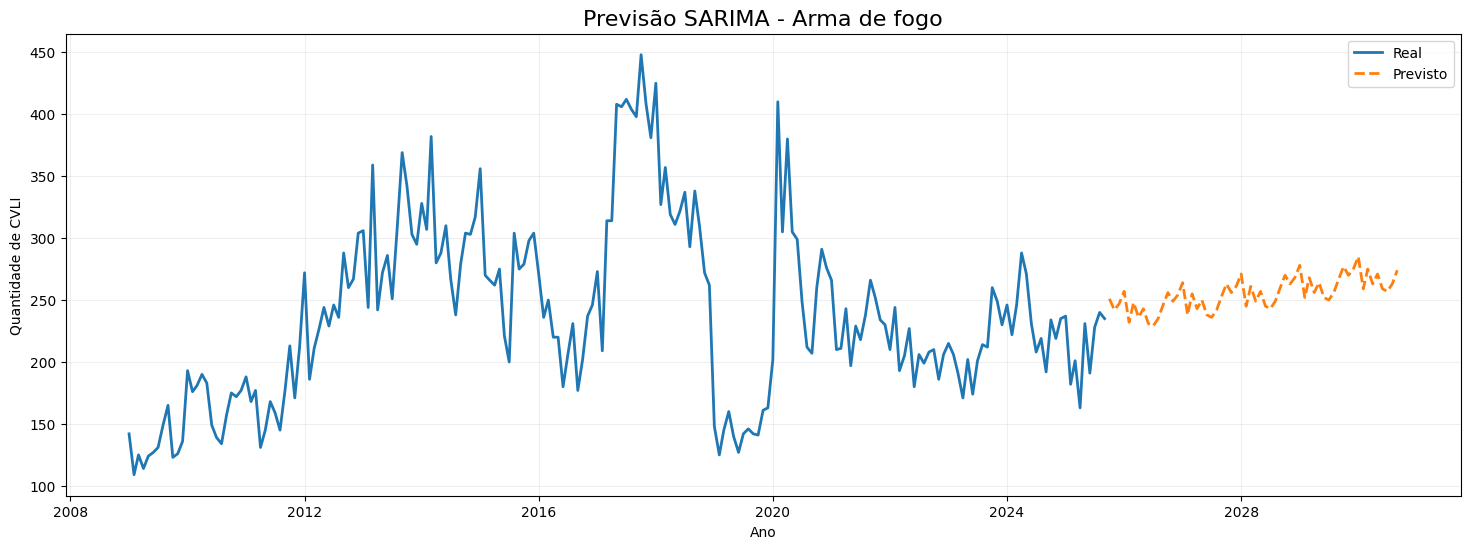

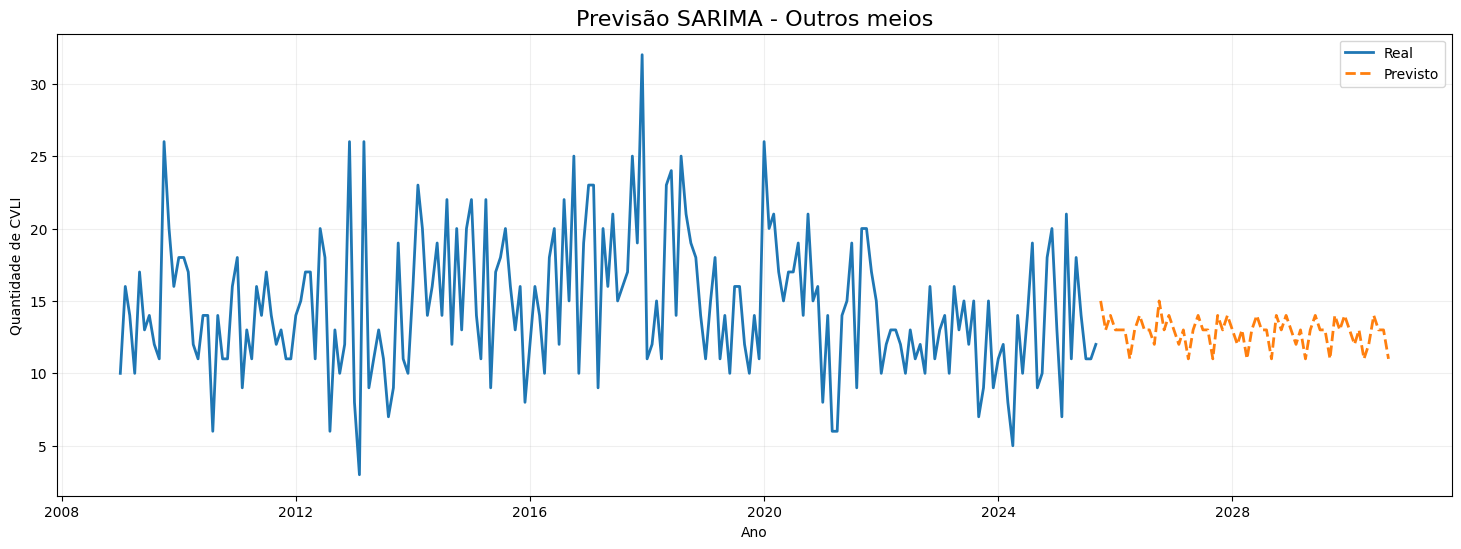

In [ ]:
for meio in df_meios_series_filtrada['Meio Empregado'].unique():

    serie_real = df_meios_series_filtrada[df_meios_series_filtrada['Meio Empregado'] == meio]
    serie_real = serie_real.sort_values("Mês_Index")

    serie_prevista = projecao_meios[projecao_meios['Meio Empregado'] == meio]

    plt.figure(figsize=(18,6))

    plt.plot(serie_real['Mês_Index'], serie_real['CVLI_Observado'], label="Real", linewidth=2)

    plt.plot(serie_prevista['Data'], serie_prevista['CVLI_Projetado'], linestyle='--', label="Previsto", linewidth=2)

    plt.title(f"Previsão SARIMA - {meio}", fontsize=16)
    plt.xlabel("Ano")
    plt.ylabel("Quantidade de CVLI")
    plt.legend()
    plt.grid(alpha=0.2)

    plt.show()



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX

df['Data'] = pd.to_datetime(df['Data'], errors='coerce')
df['Ano'] = df['Data'].dt.year
df['Mês'] = df['Data'].dt.month

def projetar_segmento(df_observado, df_populacao, coluna_segmento):
    """
    df_observado = dataframe com CVLI_Observado + Ano + Mês + Município
    df_populacao = dataframe contendo 'Município' e 'População estimada - pessoas [2025]'
    coluna_segmento = coluna usada para segmentação (ex: 'Município')
    """
    previsoes_segmento = {}

    df_temp = df_observado.copy()

    df_temp['Ano'] = df_temp['Ano'].astype(int)
    df_temp['Mês'] = df_temp['Mês'].astype(int)

    df_temp['Mês_Index'] = pd.to_datetime(
        df_temp['Ano'].astype(str) + '-' + df_temp['Mês'].astype(str) + '-01'
    )

    df_temp = df_temp.merge(
        df_populacao[['Município', 'População estimada - pessoas [2025]']],
        on='Município',
        how='left'
    )

    df_temp['Taxa_100k'] = (
        df_temp['CVLI_Observado'] /
        df_temp['População estimada - pessoas [2025]']
    ) * 100000

    for segmento in df_temp[coluna_segmento].unique():

        print(f"\nTreinando SARIMA para: {segmento}")

        serie = df_temp[df_temp[coluna_segmento] == segmento].copy()
        serie = serie.sort_values("Mês_Index").set_index('Mês_Index')


        y = serie['Taxa_100k'].asfreq('MS', fill_value=0)


        modelo = SARIMAX(
            y,
            order=(1, 1, 1),
            seasonal_order=(1, 1, 1, 12),
            enforce_stationarity=False,
            enforce_invertibility=False,
            freq='MS'
        )

        try:
            resultado = modelo.fit(disp=False)


            forecast = resultado.get_forecast(steps=60)
            previsoes_taxa = forecast.predicted_mean.clip(lower=0)


            pop = serie['População estimada - pessoas [2025]'].iloc[0]
            previsoes_qtd = (previsoes_taxa * pop / 100000).round()

            previsoes_segmento[segmento] = previsoes_qtd

        except Exception as e:
            print(f"Erro ao treinar SARIMA para {segmento}: {e}")
            continue


    list_projecao = []

    for segmento, serie_prevista in previsoes_segmento.items():
        df_seg_temp = serie_prevista.reset_index()
        df_seg_temp.columns = ['Data', 'CVLI_Projetado']
        df_seg_temp[coluna_segmento] = segmento
        df_seg_temp['Ano'] = df_seg_temp['Data'].dt.year
        list_projecao.append(df_seg_temp)

    if list_projecao:
        return pd.concat(list_projecao, ignore_index=True)

    return pd.DataFrame(columns=['Data', 'CVLI_Projetado', coluna_segmento, 'Ano'])


top_municipios = (
    df_final
    .sort_values('taxa_por_100mil', ascending=False)['Município']
    .unique()[:4]
)

print("\nMunicípios com maior taxa proporcional:", top_municipios)




df_municipio_series = (
    df.groupby(['Ano', 'Mês', 'Município'])
    .size()
    .reset_index(name='CVLI_Observado')
)

df_municipio_series_filtrada = df_municipio_series[
    df_municipio_series['Município'].isin(top_municipios)
].copy()


df_municipio_series_filtrada['Mês_Index'] = pd.to_datetime(
    df_municipio_series_filtrada['Ano'].astype(str) + '-' +
    df_municipio_series_filtrada['Mês'].astype(str) + '-01'
)


projecao_municipios = projetar_segmento(
    df_municipio_series_filtrada,
    df3,
    'Município'
)

print("\nProjeções geradas com sucesso!")
for mun in projecao_municipios['Município'].unique():
    print("\n==== MUNICÍPIO:", mun, "====")
    print(projecao_municipios[projecao_municipios['Município'] == mun].to_string())


def criar_dashboard_segmentado(df_observado, df_projetado, coluna_segmento, titulo):

    df_obs = df_observado.copy()
    df_proj = df_projetado.copy()


    df_obs['Data'] = pd.to_datetime(
        df_obs['Ano'].astype(str) + '-' +
        df_obs['Mês'].astype(str) + '-01'
    )
    df_obs['Ano'] = df_obs['Data'].dt.year
    df_obs = df_obs.rename(columns={'CVLI_Observado': 'CVLI_Total'})


    df_obs_anual = df_obs.groupby([coluna_segmento, 'Ano'])['CVLI_Total'].sum().reset_index()


    df_proj = df_proj.rename(columns={'CVLI_Projetado': 'CVLI_Total'})
    df_proj_anual = df_proj.groupby([coluna_segmento, 'Ano'])['CVLI_Total'].sum().reset_index()


    df_final = pd.concat([df_obs_anual, df_proj_anual], ignore_index=True)
    df_final = df_final[(df_final['Ano'] >= 2018) & (df_final['Ano'] <= 2030)]


    plt.figure(figsize=(16, 8))
    sns.lineplot(
        data=df_final,
        x='Ano',
        y='CVLI_Total',
        hue=coluna_segmento,
        style=coluna_segmento,
        markers=True,
        dashes=False,
        linewidth=3
    )

    plt.title(titulo, fontsize=18)
    plt.xlabel('Ano', fontsize=14)
    plt.ylabel('CVLI (Total Anual)', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


Municípios com maior taxa proporcional: ['São João do Jaguaribe' 'Ibicuitinga' 'Quixeré' 'Guaiúba']

Treinando SARIMA para: Quixeré

Treinando SARIMA para: São João do Jaguaribe

Treinando SARIMA para: Guaiúba

Treinando SARIMA para: Ibicuitinga

Projeções geradas com sucesso!

==== MUNICÍPIO: Quixeré ====
         Data  CVLI_Projetado Município   Ano
0  2025-10-01             2.0   Quixeré  2025
1  2025-11-01             1.0   Quixeré  2025
2  2025-12-01             1.0   Quixeré  2025
3  2026-01-01             1.0   Quixeré  2026
4  2026-02-01             1.0   Quixeré  2026
5  2026-03-01             1.0   Quixeré  2026
6  2026-04-01             1.0   Quixeré  2026
7  2026-05-01             1.0   Quixeré  2026
8  2026-06-01             0.0   Quixeré  2026
9  2026-07-01             1.0   Quixeré  2026
10 2026-08-01             1.0   Quixeré  2026
11 2026-09-01             1.0   Quixeré  2026
12 2026-10-01             2.0   Quixeré  2026
13 2026-11-01             1.0   Quixeré  2026
1

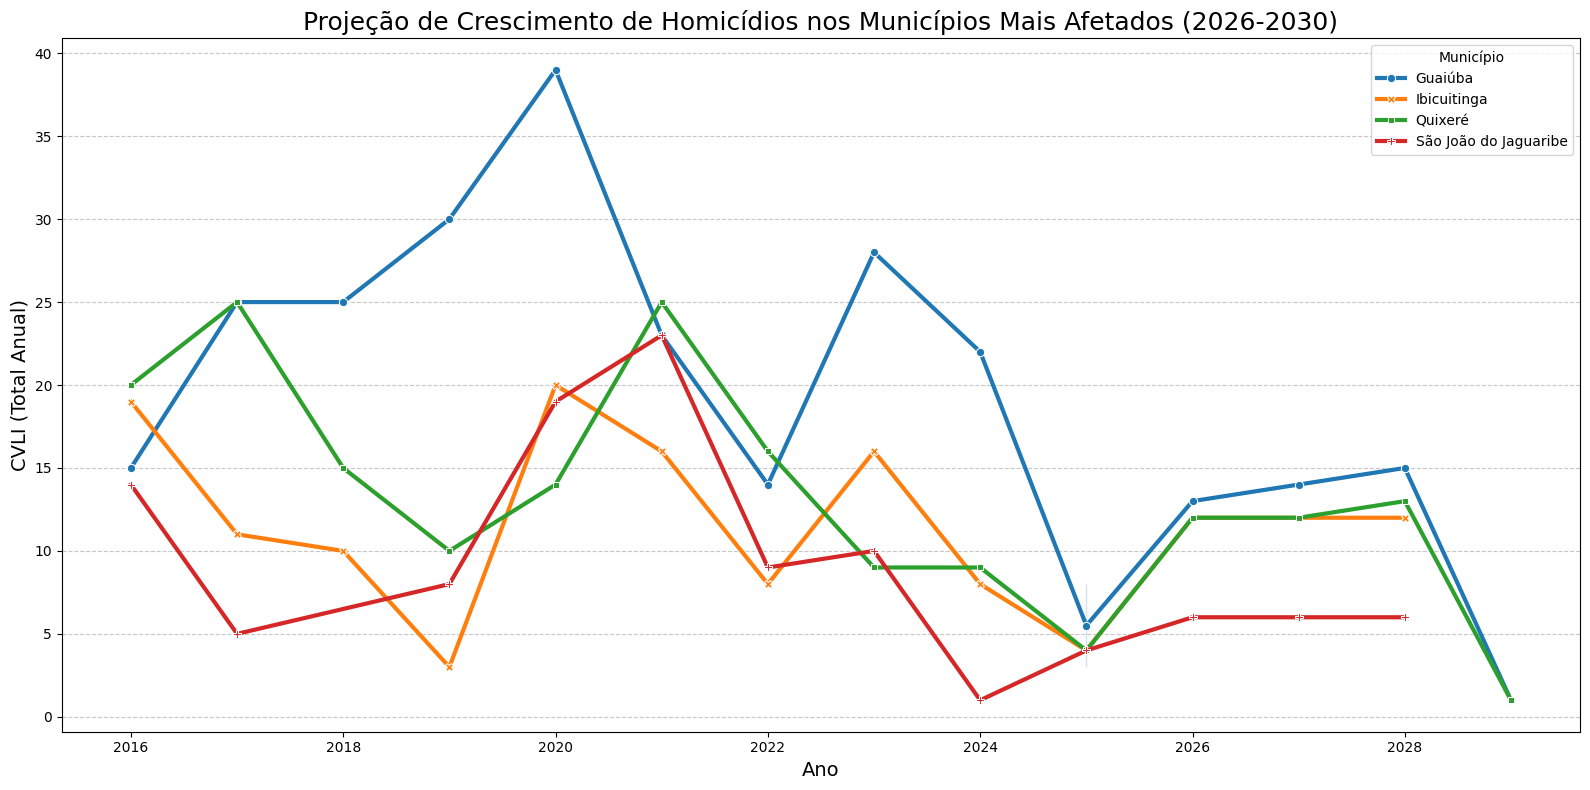

In [ ]:
criar_dashboard_segmentado(
    df_municipio_series_filtrada,
    projecao_municipios,
    'Município',
    'Projeção de Crescimento de Homicídios nos Municípios Mais Afetados (2026-2030)'
)

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

df['Data'] = pd.to_datetime(df['Data'], errors='coerce')
df['Ano'] = df['Data'].dt.year
df['Mês'] = df['Data'].dt.month

df_monthly_crimes = df.groupby(['Ano', 'Mês']).size().reset_index(name='CVLI_Observado')
df_monthly_crimes['Mês_Index'] = pd.to_datetime(df_monthly_crimes['Ano'].astype(str) + '-' + df_monthly_crimes['Mês'].astype(str) + '-01')
df_monthly_crimes = df_monthly_crimes.set_index('Mês_Index')['CVLI_Observado']

train_size = int(len(df_monthly_crimes) * 0.8)
train = df_monthly_crimes.iloc[:train_size]
test = df_monthly_crimes.iloc[train_size:]

model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12), freq='MS')
model_fit = model.fit(disp=False)

start_index = test.index[0]
end_index = test.index[-1]
pred = model_fit.get_prediction(start=start_index, end=end_index).predicted_mean

mae = mean_absolute_error(test, pred)
rmse = np.sqrt(mean_squared_error(test, pred))
mape = np.mean(np.abs((test - pred) / test.replace(0, np.nan).dropna())) * 100

print("ACURÁCIA DO MODELO SARIMA")
print("--------------------------")
print(f"MAE  = {mae:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"MAPE = {mape:.2f}%")


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ACURÁCIA DO MODELO SARIMA
--------------------------
MAE  = 35.54
RMSE = 42.39
MAPE = 13.69%
